Saving Invistico_Airline (1).csv to Invistico_Airline (1).csv
Dataset Loaded Successfully!
  satisfaction  Gender   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1    satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Female  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Female  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Female  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  ...  Online suppor

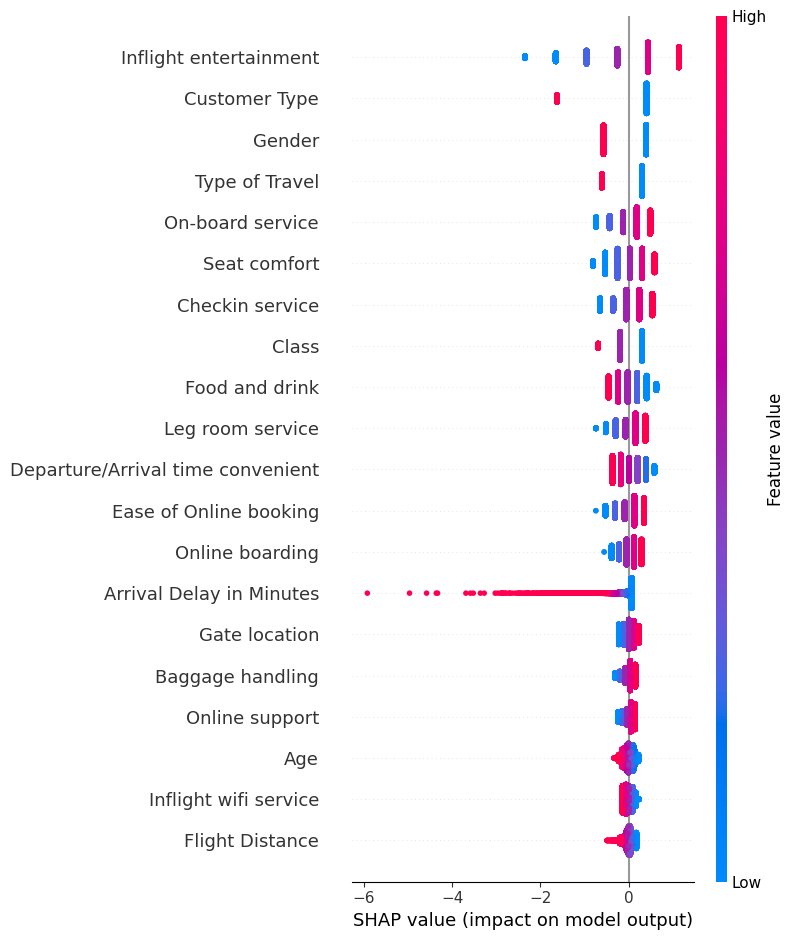

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Upload file to Google Colab
from google.colab import files
uploaded = files.upload()

# Read dataset (assuming it's a CSV file)
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_csv(file_name)

# Display basic info
print("Dataset Loaded Successfully!")
print(df.head())

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Handle missing values
df.fillna(df.median(), inplace=True)

# Define features (X) and target (y)
X = df.drop(columns=['satisfaction'])  # Assuming 'satisfaction' is the dependent variable
y = df['satisfaction']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# SHAP Analysis
explainer = shap.Explainer(log_reg, X_train)
shap_values = explainer(X_test)

# Plot feature importance
shap.summary_plot(shap_values, X_test, feature_names=df.drop(columns=['satisfaction']).columns)
